In [73]:
pip install sdv

Note: you may need to restart the kernel to use updated packages.


In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

import argparse
import sys
import copy
import os
import glob
import scipy as sp
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
import pickle
import time
#from util import *
#from ops import *
import multiprocessing
from multiprocessing import Pool
#from model import DCGAN
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#np.set_printoptions(threshold='nan')

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [3]:
#Setting up the dataset for ML
# Text file data converted to integer data type
x_data = np.loadtxt("dataset/x_dataTrain.txt", dtype=float)
print(x_data)

[[3.27030e-24 3.07616e-24 5.22539e-24 ... 1.32958e-21 1.33228e-21
  1.35562e-21]
 [1.30267e-20 1.30677e-20 1.31157e-20 ... 3.81686e-20 3.81212e-20
  3.80739e-20]
 [6.26322e-21 6.28294e-21 6.30602e-21 ... 1.83835e-20 1.83606e-20
  1.83378e-20]
 ...
 [2.18046e-21 2.18672e-21 2.19415e-21 ... 4.09628e-21 4.09113e-21
  4.08599e-21]
 [8.45625e-21 8.48075e-21 8.50976e-21 ... 1.65705e-20 1.65496e-20
  1.65289e-20]
 [9.18122e-27 9.43401e-27 1.16085e-26 ... 4.02891e-22 4.05835e-22
  4.14389e-22]]


In [4]:
#Setting up the dataset for ML
# Text file data converted to integer data type
y_data = np.loadtxt("dataset/y_dataTrain.txt", dtype=float)
print(y_data)

[[5.44779525e-02 3.63563344e-01 3.93226327e-01 ... 3.84039400e-03
  1.04632279e-03 8.05759487e-06]
 [4.16023007e-02 1.98831946e-01 3.19697149e-01 ... 1.58676888e-04
  2.70865681e-04 6.98852685e-06]
 [3.25809662e-02 3.30184164e-01 2.25277622e-01 ... 3.64259914e-04
  1.77938880e-05 5.15590766e-06]
 ...
 [6.00137545e-03 2.25446819e-01 2.36290974e-01 ... 3.41272939e-03
  1.68012889e-04 8.55777941e-06]
 [9.61424398e-03 2.41019755e-01 4.74460251e-01 ... 2.28148605e-03
  1.53862644e-04 3.59720563e-06]
 [1.48247666e-02 4.65782909e-01 3.00848722e-01 ... 5.70894991e-03
  1.74632155e-04 1.76412088e-06]]


In [5]:
feature_dict = {
    0 : 'H2O',
    1 : 'CO2',
    2 : 'O2',
    3 : 'N2',
    4 : 'CH4',
    5 : 'N2O',
    6 : 'CO',
    7 : 'O3',
    8 : 'SO2',
    9 : 'NH3',
    10 : 'C2H6',
    11 : 'NO2'
}

In [77]:
features = pd.DataFrame(x_data)
labels = pd.DataFrame(y_data)

In [78]:
labels.rename(columns=feature_dict,
          inplace=True)

In [10]:
labelsSum = labels[['H2O','CO2', 'O2', 'N2', 'CH4']]

labelsSum['H2O'] = labelsSum['H2O'].apply(lambda x: x*100)
labelsSum['CO2'] = labelsSum['CO2'].apply(lambda x: x*100)
labelsSum['O2'] = labelsSum['O2'].apply(lambda x: x*100)
labelsSum['N2'] = labelsSum['N2'].apply(lambda x: x*100)
labelsSum['CH4'] = labelsSum['CH4'].apply(lambda x: x*100)

labelsSum

<ipython-input-10-bf7c5d99e0ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelsSum['H2O'] = labelsSum['H2O'].apply(lambda x: x*100)
<ipython-input-10-bf7c5d99e0ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelsSum['CO2'] = labelsSum['CO2'].apply(lambda x: x*100)
<ipython-input-10-bf7c5d99e0ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,H2O,CO2,O2,N2,CH4
0,5.447795,36.356334,39.322633,2.347669,12.807289
1,4.160230,19.883195,31.969715,37.276586,4.568130
2,3.258097,33.018416,22.527762,36.730550,2.988821
3,4.756591,22.928300,52.232608,0.433152,14.348949
4,8.355934,19.788123,39.827563,22.288283,6.370204
...,...,...,...,...,...
9998,3.211915,34.743236,35.990073,22.761101,1.522112
9999,1.049656,18.019818,33.185333,42.389717,3.421742
10000,0.600138,22.544682,23.629097,46.500135,5.045736
10001,0.961424,24.101976,47.446025,19.817285,4.904123


In [123]:
plt.plot(features.iloc[0,:])
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\abhi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-123-9e2510e0858f>", line 2, in <module>
    plt.show()
  File "C:\Users\abhi\AppData\Roaming\Python\Python38\site-packages\matplotlib\pyplot.py", line 353, in show
    return _backend_mod.show(*args, **kwargs)
  File "C:\Users\abhi\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py", line 41, in show
    display(
  File "C:\Users\abhi\anaconda3\lib\site-packages\IPython\core\display.py", line 313, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "C:\Users\abhi\anaconda3\lib\site-packages\IPython\core\formatters.py", line 180, in format
    data = formatter(obj)
  File "C:\Users\abhi\anaconda3\lib\site-packages\decorator.py", line 231, in fun
    return caller(func, *(extras + args), **kw)
  File "C:\Users\abhi\anacond

TypeError: object of type 'NoneType' has no len()

In [47]:
features['CO2'] = labelsSum[['CO2']]

In [114]:
features.columns = features.columns.astype(str)
synth = features[0:100]
synth = synth.iloc[:, 0:1000]

In [115]:
synth

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,3.270300e-24,3.076160e-24,5.225390e-24,3.689310e-24,3.240650e-24,4.764720e-24,3.454470e-24,2.795120e-24,3.891230e-24,3.698980e-24,...,1.309390e-21,1.215400e-21,8.079580e-22,7.812760e-22,7.613900e-22,1.145330e-21,1.717420e-21,1.461940e-21,1.013330e-21,1.159970e-21
1,1.302670e-20,1.306770e-20,1.311570e-20,1.316380e-20,1.321210e-20,1.326040e-20,1.330900e-20,1.335760e-20,1.340640e-20,1.345540e-20,...,1.397270e-19,1.399100e-19,1.400960e-19,1.402820e-19,1.404680e-19,1.406540e-19,1.408390e-19,1.410260e-19,1.412160e-19,1.414070e-19
2,6.263220e-21,6.282940e-21,6.306020e-21,6.329150e-21,6.352340e-21,6.375610e-21,6.398950e-21,6.422350e-21,6.445830e-21,6.469360e-21,...,6.730680e-20,6.738920e-20,6.747760e-20,6.756750e-20,6.765760e-20,6.774700e-20,6.783590e-20,6.792850e-20,6.802990e-20,6.813070e-20
3,1.304900e-22,1.228430e-22,2.088400e-22,1.475690e-22,1.297280e-22,1.908950e-22,1.385130e-22,1.121670e-22,1.562800e-22,1.486800e-22,...,7.879480e-20,7.313330e-20,4.860290e-20,4.699560e-20,4.578750e-20,6.887140e-20,1.032730e-19,8.789330e-20,6.089540e-20,6.970590e-20
4,1.306080e-23,1.228330e-23,2.086170e-23,1.472660e-23,1.293340e-23,1.901270e-23,1.378200e-23,1.114950e-23,1.551910e-23,1.474980e-23,...,4.565430e-21,4.237470e-21,2.816260e-21,2.723210e-21,2.653310e-21,3.991160e-21,5.985010e-21,5.093990e-21,3.529570e-21,4.040470e-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.190300e-20,3.202310e-20,3.216060e-20,3.229850e-20,3.243700e-20,3.257590e-20,3.271540e-20,3.285530e-20,3.299580e-20,3.313680e-20,...,6.942120e-19,6.956890e-19,6.971680e-19,6.986520e-19,7.001420e-19,7.016190e-19,7.030930e-19,7.045760e-19,7.060950e-19,7.076170e-19
96,5.651750e-23,5.316880e-23,9.032690e-23,6.378160e-23,5.603170e-23,8.239310e-23,5.974280e-23,4.834560e-23,6.731210e-23,6.399410e-23,...,2.477550e-20,2.299920e-20,1.528940e-20,1.478600e-20,1.441000e-20,2.167860e-20,3.251120e-20,2.767630e-20,1.918250e-20,2.196080e-20
97,1.822510e-26,1.873090e-26,2.305260e-26,1.969400e-26,1.872550e-26,2.357580e-26,1.709240e-26,1.705390e-26,2.180420e-26,1.913930e-26,...,8.481600e-23,9.782620e-23,4.699080e-23,3.767490e-23,4.805270e-23,8.108410e-23,1.387080e-22,1.228250e-22,6.583270e-23,8.823280e-23
98,1.609550e-20,1.616190e-20,1.623710e-20,1.631260e-20,1.638840e-20,1.646450e-20,1.654090e-20,1.661760e-20,1.669460e-20,1.677200e-20,...,4.191600e-19,4.196970e-19,4.202350e-19,4.207780e-19,4.213220e-19,4.218620e-19,4.223970e-19,4.229360e-19,4.234860e-19,4.240320e-19


In [116]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(synth)

C:\Users\abhi\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\abhi\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\abhi\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\abhi\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\abhi\anaconda3\lib\site-packages\copulas\univariate\truncated_gaussian.py:45: RuntimeWarning: invalid value encountered in double_scalars
  a = (self.min - loc) / scale
C:\Users\abhi\anaconda3\lib\site-packages\copulas\univa

In [120]:
sample = model.sample(num_rows=5000)
sample

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,7.311802e-25,4.440711e-27,2.763600e-25,4.457464e-25,3.213437e-26,1.455467e-26,4.158529e-27,1.600409e-26,2.033640e-25,4.212368e-25,...,4.326432e-23,8.445156e-23,2.173518e-23,1.674951e-23,2.253529e-23,4.923027e-23,1.181520e-22,6.491664e-23,3.482103e-23,5.802358e-23
1,1.824392e-23,1.228197e-23,9.350975e-24,1.306852e-23,6.578873e-23,2.317799e-23,1.228638e-23,3.721305e-23,7.844948e-24,1.267748e-23,...,3.568858e-21,4.901519e-21,1.803292e-21,1.361756e-21,1.768899e-21,3.322884e-21,4.050920e-21,3.783345e-21,2.950023e-21,3.961519e-21
2,1.314350e-21,5.295329e-21,1.101586e-21,1.188962e-21,8.419359e-21,4.084246e-21,5.646764e-21,6.625118e-21,9.946742e-22,1.198683e-21,...,4.677239e-20,4.897679e-20,3.302920e-20,2.868558e-20,3.226456e-20,4.225925e-20,3.891749e-20,4.467516e-20,4.239667e-20,4.637487e-20
3,1.341432e-21,4.283499e-21,1.044820e-21,1.190706e-21,6.820959e-21,3.212937e-21,4.399360e-21,5.404206e-21,9.945730e-22,1.183446e-21,...,7.546902e-20,7.347981e-20,4.520583e-20,3.650845e-20,4.354676e-20,6.284708e-20,5.460562e-20,7.122215e-20,6.443708e-20,7.090611e-20
4,1.085131e-26,3.137242e-27,4.680009e-27,6.416102e-27,1.838174e-26,5.429383e-27,2.966199e-27,8.114739e-27,3.743469e-27,5.919285e-27,...,2.109352e-23,3.313305e-23,1.227289e-23,9.839329e-24,1.286144e-23,2.296225e-23,4.499962e-23,3.132989e-23,1.762243e-23,2.606259e-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.490989e-20,1.069247e-20,2.432034e-20,2.455500e-20,1.551555e-20,9.912721e-21,1.133017e-20,1.332621e-20,2.373087e-20,2.506160e-20,...,1.267664e-19,1.236900e-19,9.177604e-20,8.239580e-20,8.855143e-20,1.122706e-19,1.028084e-19,1.178854e-19,1.147225e-19,1.207233e-19
4996,6.875890e-25,3.647471e-27,3.586741e-25,4.500811e-25,3.327883e-26,1.701182e-26,3.673099e-27,1.405107e-26,2.059225e-25,4.323315e-25,...,7.855414e-22,1.285826e-21,3.828921e-22,3.182615e-22,3.771929e-22,8.227923e-22,1.680012e-21,9.992081e-22,6.169244e-22,9.439411e-22
4997,3.701882e-21,2.904604e-21,3.515702e-21,3.506143e-21,4.990664e-21,2.917604e-21,3.125596e-21,3.890421e-21,3.100843e-21,3.533960e-21,...,9.218368e-20,8.539034e-20,5.132564e-20,4.198646e-20,4.815830e-20,7.343947e-20,6.712493e-20,8.469548e-20,7.458068e-20,8.185603e-20
4998,3.657778e-21,1.651161e-20,2.827545e-21,3.316396e-21,2.169810e-20,1.020707e-20,1.712103e-20,1.864558e-20,2.926532e-21,3.348165e-21,...,1.989124e-20,2.447975e-20,1.522844e-20,1.298135e-20,1.534419e-20,1.993890e-20,1.979114e-20,2.048633e-20,1.931715e-20,2.214823e-20


array([[<AxesSubplot:title={'center':'990'}>]], dtype=object)

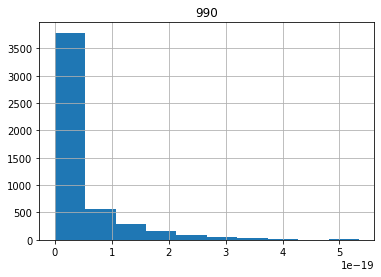

In [130]:
sample.hist(column="990")

In [80]:
features

,0,1,2,3,4,5,6,7,8,9,...,4368,4369,4370,4371,4372,4373,4374,4375,4376,4377
0,3.270300e-24,3.076160e-24,5.225390e-24,3.689310e-24,3.240650e-24,4.764720e-24,3.454470e-24,2.795120e-24,3.891230e-24,3.698980e-24,...,1.376480e-21,1.376990e-21,1.355330e-21,1.324260e-21,1.336550e-21,1.361660e-21,1.364640e-21,1.329580e-21,1.332280e-21,1.355620e-21
1,1.302670e-20,1.306770e-20,1.311570e-20,1.316380e-20,1.321210e-20,1.326040e-20,1.330900e-20,1.335760e-20,1.340640e-20,1.345540e-20,...,3.850080e-20,3.845330e-20,3.840630e-20,3.835870e-20,3.831060e-20,3.826360e-20,3.821610e-20,3.816860e-20,3.812120e-20,3.807390e-20
2,6.263220e-21,6.282940e-21,6.306020e-21,6.329150e-21,6.352340e-21,6.375610e-21,6.398950e-21,6.422350e-21,6.445830e-21,6.469360e-21,...,1.854890e-20,1.853970e-20,1.856210e-20,1.848600e-20,1.845160e-20,1.843000e-20,1.840650e-20,1.838350e-20,1.836060e-20,1.833780e-20
3,1.304900e-22,1.228430e-22,2.088400e-22,1.475690e-22,1.297280e-22,1.908950e-22,1.385130e-22,1.121670e-22,1.562800e-22,1.486800e-22,...,6.746040e-20,6.748270e-20,6.641940e-20,6.489600e-20,6.549940e-20,6.672610e-20,6.687130e-20,6.515310e-20,6.528560e-20,6.642790e-20
4,1.306080e-23,1.228330e-23,2.086170e-23,1.472660e-23,1.293340e-23,1.901270e-23,1.378200e-23,1.114950e-23,1.551910e-23,1.474980e-23,...,4.133990e-21,4.135330e-21,4.070220e-21,3.976870e-21,4.013900e-21,4.089000e-21,4.097860e-21,3.992650e-21,4.000840e-21,4.070820e-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,1.265260e-25,1.299290e-25,1.597740e-25,1.363810e-25,1.295610e-25,1.629850e-25,1.180660e-25,1.177020e-25,1.503630e-25,1.318770e-25,...,1.973310e-21,1.971840e-21,1.921200e-21,1.884070e-21,1.885630e-21,1.944230e-21,1.953540e-21,1.888150e-21,1.901630e-21,1.941580e-21
9999,7.476030e-23,7.030420e-23,1.193930e-22,8.427400e-23,7.400620e-23,1.087830e-22,7.884870e-23,6.378260e-23,8.877210e-23,8.436460e-23,...,2.112910e-20,2.183180e-20,2.217640e-20,2.123880e-20,2.016960e-20,2.131870e-20,2.104430e-20,2.003770e-20,1.996530e-20,2.031490e-20
10000,2.180460e-21,2.186720e-21,2.194150e-21,2.201590e-21,2.209050e-21,2.216530e-21,2.224030e-21,2.231550e-21,2.239090e-21,2.246650e-21,...,4.132430e-21,4.127260e-21,4.122090e-21,4.116930e-21,4.111730e-21,4.106600e-21,4.101450e-21,4.096280e-21,4.091130e-21,4.085990e-21
10001,8.456250e-21,8.480750e-21,8.509760e-21,8.538850e-21,8.568020e-21,8.597260e-21,8.626570e-21,8.655970e-21,8.685430e-21,8.714970e-21,...,1.671650e-20,1.669560e-20,1.667480e-20,1.665390e-20,1.663290e-20,1.661220e-20,1.659130e-20,1.657050e-20,1.654960e-20,1.652890e-20


In [11]:
#Splitting dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labelsSum, test_size=0.70, random_state=42)

In [12]:
scaler = StandardScaler()
X_scaledTrain = scaler.fit_transform(X_train)
X_scaledTest = scaler.fit_transform(X_test)

In [520]:
type(y_scaledTrain)

numpy.ndarray

In [13]:
y_scaler = StandardScaler()
y_scaledTrain = y_scaler.fit_transform(y_train)
y_scaledTest = y_scaler.fit_transform(y_test)

In [751]:
y_scaledTest

array([[-0.50399804, -0.13324404,  0.88833202, -0.61495047, -0.183119  ],
       [ 0.21654908,  0.33432353, -1.32264436,  1.08736848, -0.67693877],
       [-0.4079977 , -0.97569935,  0.27593155,  0.82335499, -0.8535889 ],
       ...,
       [ 1.28723368, -0.64846457,  1.98582797, -1.59074286,  0.29414304],
       [-0.93719655,  0.79388741, -0.94258203,  0.20182407,  0.86167107],
       [-0.92277409, -0.1353677 ,  0.79135147, -0.66801386,  0.64280572]])

In [653]:
#Baseline model
from sklearn.linear_model import LinearRegression
# define model
model = LinearRegression()
# fit model
model.fit(X_scaledTrain, y_scaledTrain)

LinearRegression()

In [655]:
#Calculating MAE for linear regression
y_pred = model.predict(X_scaledTest)
mean_absolute_error(y_scaledTest, y_pred)

123.71277904552942

In [665]:
y1 = pd.DataFrame(y_pred, columns = [0,1,2,3,4])
y2 = pd.DataFrame(y_scaledTest, columns = [0,1,2,3,4])

In [711]:
#Applying PCA for random forest regression
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaledTrain)
principalDf = pd.DataFrame(data = principalComponents)

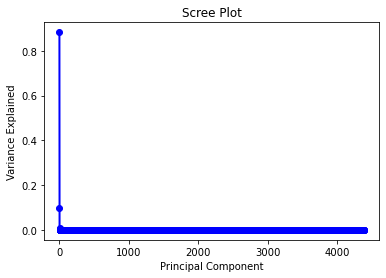

In [712]:
#Graphing scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [398]:
pca_features = pca.explained_variance_ratio_[:10]

In [747]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, shuffle=True)

# Testing Neural Network Regression Model

In [16]:
#Creating Neural Network model
exoAtmos = Sequential()

exoAtmos.add(Dense(32, kernel_initializer='normal',input_dim = X_scaledTrain.shape[1], activation='relu'))
exoAtmos.add(BatchNormalization())


# The Output Layer :
exoAtmos.add(Dense(5))

opt = tf.keras.optimizers.SGD(learning_rate=1)
# Compile the network :
exoAtmos.compile(loss='mae', optimizer=opt)
exoAtmos.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                140128    
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 140,421
Trainable params: 140,357
Non-trainable params: 64
_________________________________________________________________


In [34]:
#Training the model
history = exoAtmos.fit(X_scaledTrain, y_scaledTrain, epochs=100, batch_size=64, validation_split = 0.2)

Epoch 1/100
38/38 [==============================] - 0s 6ms/step - loss: 0.7754 - val_loss: 0.7965
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.7756 - val_loss: 0.7889
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 0.7761 - val_loss: 0.7909
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7766 - val_loss: 0.7921
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.7756 - val_loss: 0.7890
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.7759 - val_loss: 0.7926
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 0.7748 - val_loss: 0.7930
Epoch 8/100
38/38 [==============================] - 0s 4ms/step - loss: 0.7758 - val_loss: 0.7861
Epoch 9/100
38/38 [==============================] - 0s 4ms/step - loss: 0.7754 - val_loss: 0.7888
Epoch 10/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7766 - val_loss: 0.7852
Epoch 11/

38/38 [==============================] - 0s 5ms/step - loss: 0.7734 - val_loss: 0.7839
Epoch 84/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7739 - val_loss: 0.7879
Epoch 85/100
38/38 [==============================] - 0s 4ms/step - loss: 0.7746 - val_loss: 0.7829
Epoch 86/100
38/38 [==============================] - 0s 4ms/step - loss: 0.7742 - val_loss: 0.7892
Epoch 87/100
38/38 [==============================] - 0s 4ms/step - loss: 0.7734 - val_loss: 0.7865
Epoch 88/100
38/38 [==============================] - 0s 6ms/step - loss: 0.7740 - val_loss: 0.7861
Epoch 89/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7732 - val_loss: 0.7956
Epoch 90/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7738 - val_loss: 0.7894
Epoch 91/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7744 - val_loss: 0.7865
Epoch 92/100
38/38 [==============================] - 0s 4ms/step - loss: 0.7723 - val_loss: 0.7897
Epoch 93/100


In [35]:
#Evaluating the model
mae = exoAtmos.evaluate(X_scaledTest, y_scaledTest, verbose=0)

In [36]:
print('>%.3f' % mae)

>0.784


dict_keys(['loss', 'val_loss'])


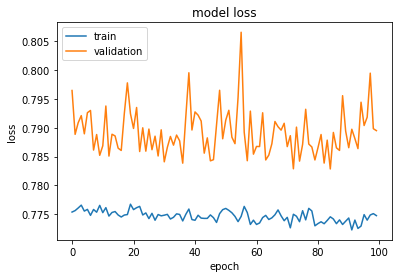

In [37]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [38]:
exoPredict = exoAtmos.predict(X_scaledTrain)

In [40]:
exoPredict

array([[-0.12465315,  0.17208698, -0.08777013, -0.04394871, -0.15113936],
       [-0.04330401,  0.06861019,  0.00251322,  0.07276705, -0.19408678],
       [-0.11712448,  0.18824437, -0.11586815, -0.04062636, -0.16664974],
       ...,
       [-0.1033885 ,  0.00297045,  0.09469694, -0.00651781, -0.23323481],
       [-0.12960985,  0.15142351, -0.06125439, -0.04265533, -0.15865283],
       [-0.12759747,  0.15658365, -0.0688495 , -0.04287009, -0.1579058 ]],
      dtype=float32)

In [41]:
exoPred_df = pd.DataFrame(exoPredict, columns = [0,1,2,3,4])
ypred_df = pd.DataFrame(y_scaledTest, columns = [0,1,2,3,4])

array([[<AxesSubplot:title={'center':'3'}>]], dtype=object)

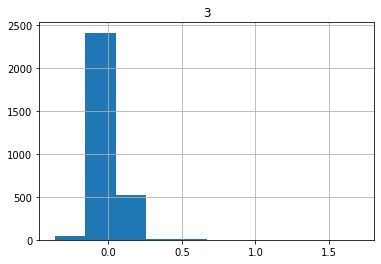

In [42]:
exoPred_df.hist(column=3)

array([[<AxesSubplot:title={'center':'3'}>]], dtype=object)

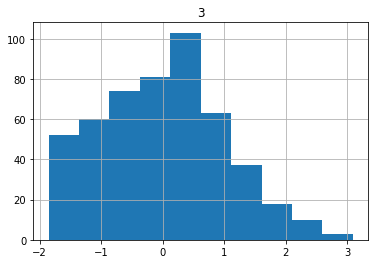

In [779]:
ypred_df.hist(column=3)

In [772]:
exoPredict.shape

(9502, 5)

In [775]:
y_scaledTrain.shape

(9502, 5)

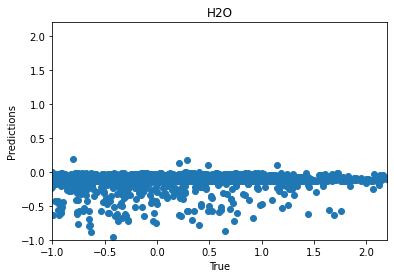

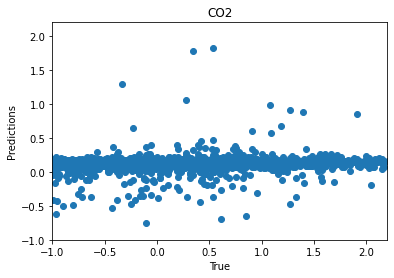

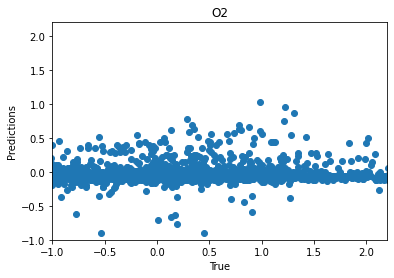

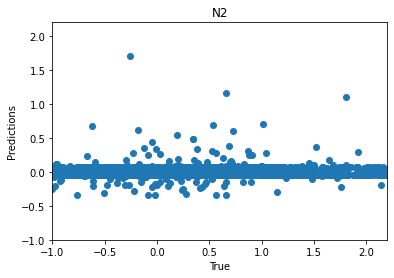

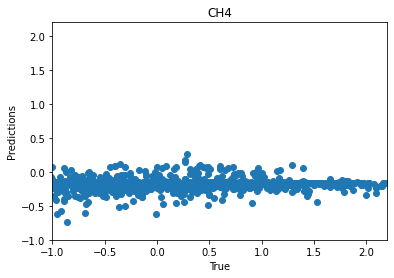

In [39]:
yyy = [-20,20] # This is just defining y = x
minx = np.min(y_scaledTest[:,:])
maxx = np.max(y_scaledTest[:,:])
miny = np.min(exoPredict[:,:])
maxy = np.max(exoPredict[:,:])
names = ['H2O','CO2', 'O2', 'N2', 'CH4']
for mol in range(5):
    plt.title(names[mol])
    plt.ylabel('Predictions')
    plt.xlabel('True')
    
    plt.xlim([-1,2.2])
    plt.ylim([-1,2.2])
    plt.scatter(y_scaledTrain[:,mol],exoPredict[:,mol])
    

    plt.show()

# 1D CNN with Keras

In [15]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical

In [353]:
print(X_scaledTrain.shape)
print(X_scaledTrain[0].shape)
print(len(X_scaledTrain[0]))

(6702, 4378)
(4378,)
4378


In [354]:
#Convert features into timesteps
sample_size = X_scaledTrain.shape[0]
time_steps = X_scaledTrain.shape[1]
input_dimension = 1

X_reTrain = X_scaledTrain.reshape(sample_size, time_steps, input_dimension)
X_reTest = X_scaledTest.reshape(X_scaledTest.shape[0], X_scaledTest.shape[1], input_dimension)

print(X_reTrain.shape)
print(X_reTrain[0].shape)
print((X_reTrain[0]))

(6702, 4378, 1)
(4378, 1)
[[ 0.64027712]
 [ 0.63970607]
 [ 0.63816855]
 ...
 [-0.15958483]
 [-0.15980762]
 [-0.16226966]]


In [415]:
#def convModel():
n_timesteps = X_reTrain.shape[1]
n_features = X_reTrain.shape[2]
model = Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.35))
    
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
    
model.add(Dense(32, activation='relu'))
model.add(Dense(5))
    
opt = tf.keras.optimizers.RMSprop(0.001)
    
model.compile(loss='mse', optimizer=opt, metrics=['mae','accuracy'])

In [416]:
hist=model.fit(X_reTrain, y_scaledTrain, epochs=50,
                    validation_split=0.2)

Epoch 1/50
168/168 [==============================] - 113s 670ms/step - loss: 2.2777 - mae: 0.8445 - accuracy: 0.2056 - val_loss: 0.9993 - val_mae: 0.7815 - val_accuracy: 0.0984
Epoch 2/50
168/168 [==============================] - 109s 651ms/step - loss: 1.0158 - mae: 0.7867 - accuracy: 0.2179 - val_loss: 0.9997 - val_mae: 0.7812 - val_accuracy: 0.2558
Epoch 3/50
168/168 [==============================] - 114s 680ms/step - loss: 1.0003 - mae: 0.7835 - accuracy: 0.2667 - val_loss: 0.9998 - val_mae: 0.7811 - val_accuracy: 0.2610
Epoch 4/50
168/168 [==============================] - 116s 689ms/step - loss: 1.0003 - mae: 0.7834 - accuracy: 0.2574 - val_loss: 0.9997 - val_mae: 0.7812 - val_accuracy: 0.2610
Epoch 5/50
168/168 [==============================] - 125s 742ms/step - loss: 1.0003 - mae: 0.7835 - accuracy: 0.2666 - val_loss: 0.9997 - val_mae: 0.7811 - val_accuracy: 0.2610
Epoch 6/50
168/168 [==============================] - 126s 750ms/step - loss: 1.0002 - mae: 0.7834 - accuracy:

KeyboardInterrupt: 

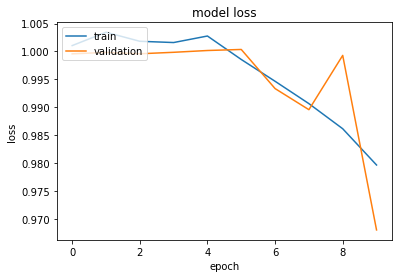

In [372]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [730]:
pca_features = pca.explained_variance_ratio_[:10]
x_pcTrain = pca.fit_transform(X_scaledTrain)[:,:2]

In [731]:
x_pcTest = pca.fit_transform(X_scaledTest)[:,:2]

In [441]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [439]:
regr.fit(x_pcTrain, y_scaledTrain)

KeyboardInterrupt: 